**MODEL**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [2]:
df = pd.read_csv("train.csv", sep=";")
print("Kích thước ban đầu:", df.shape)

df = df.dropna() # Xử lý missing values:  drop các dòng bị thiếu
print("Kích thước sau khi drop NA:", df.shape)

Kích thước ban đầu: (2999, 21)
Kích thước sau khi drop NA: (2999, 21)


In [3]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,5,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,47,1,2,2,1,0,0,0,6,4,...,1,999,0,1,-1.8,92.893,-46.2,1.334,5099.1,0
2995,53,0,1,5,0,0,2,1,6,3,...,13,999,0,1,1.1,93.994,-36.4,4.856,5191.0,0
2996,60,5,1,5,0,2,0,0,8,1,...,2,999,0,1,-1.1,94.601,-49.5,1.000,4963.6,0
2997,32,9,2,5,0,0,0,0,7,2,...,1,999,1,0,-0.1,93.200,-42.0,4.076,5195.8,0


In [4]:
# Tách X, Y (target là cột 'y' đã thành số 0/1)
X = df.drop("y", axis=1)
Y = df["y"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)

print("\nTrước scale:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# SMOTE trên tập train
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_scaled, Y_train)
print("\nPhân bố lớp Test:")
print(Y_test.value_counts())
print("\nPhân bố lớp trước SMOTE:")
print(Y_train.value_counts())
print("\nPhân bố lớp sau SMOTE:")
print(pd.Series(Y_train_resampled).value_counts())


Trước scale:
X_train: (2399, 20) X_test: (600, 20)

Phân bố lớp Test:
y
0    534
1     66
Name: count, dtype: int64

Phân bố lớp trước SMOTE:
y
0    2134
1     265
Name: count, dtype: int64

Phân bố lớp sau SMOTE:
y
1    2134
0    2134
Name: count, dtype: int64


In [5]:
# Tạo DataFrame train sau khi SMOTE (chỉ tập train)
train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
train_resampled_df["y"] = Y_train_resampled

train_resampled_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-0.389759,-1.064327,1.349991,-0.773658,-0.506635,0.910386,-0.472310,-0.747532,0.720195,0.690146,...,-0.604355,0.201941,-0.361014,0.213902,-1.197882,-1.183192,-1.222112,-1.322953,-0.886727,1
1,-1.460816,-1.064327,1.349991,0.975640,-0.506635,-1.126942,-0.472310,1.337735,-0.151524,-0.752695,...,-0.206592,0.201941,-0.361014,0.213902,-1.902586,-1.063308,-0.050944,-1.340752,-1.194177,0
2,-0.389759,0.043404,-0.291483,0.975640,-0.506635,0.910386,-0.472310,-0.747532,1.156055,1.411567,...,-0.206592,0.201941,-0.361014,0.213902,-0.108794,-0.657412,-0.311203,0.301343,0.411546,0
3,-0.973972,-0.787394,-0.291483,-0.773658,-0.506635,0.910386,-0.472310,-0.747532,-0.587384,1.411567,...,-0.604355,0.201941,-0.361014,0.213902,0.852166,0.572264,-0.463021,0.784785,0.845199,0
4,-0.779234,0.043404,-0.291483,-0.190558,-0.506635,-1.126942,2.212693,-0.747532,1.156055,-0.752695,...,-0.206592,0.201941,-0.361014,0.213902,-0.108794,-0.657412,-0.311203,0.342109,0.411546,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,-0.761620,-1.064327,2.095900,0.975640,-0.506635,-0.201150,-0.472310,-0.747532,-1.459104,0.230777,...,-0.387341,0.201941,-0.361014,0.213902,0.852166,-0.239528,0.968407,0.786508,0.845199,1
4264,-0.770329,-1.064327,-0.321510,-0.169226,-0.461261,0.910386,-0.472310,-0.747532,0.720195,-0.752695,...,-0.604355,0.201941,-0.361014,0.213902,-1.197882,-1.183192,-1.222112,-1.318937,-0.886727,1
4265,0.311110,-1.064327,0.610542,0.975640,-0.506635,-1.126942,-0.472310,-0.747532,-1.459104,0.293710,...,-0.425171,0.201941,-0.361014,0.213902,0.852166,-0.239528,0.968407,0.786968,0.845199,1
4266,-0.539717,0.215189,2.148784,0.676295,-0.506635,0.910386,-0.472310,-0.747532,-1.459104,1.041212,...,-0.400156,0.201941,-0.361014,0.213902,0.852166,-0.239528,0.968407,0.786802,0.845199,1


In [6]:
class MachineLearning:
    def __init__(self, df, X_train, X_test, Y_train, Y_test):
        self.df = df
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test

        # Default configurations
        self.configs = {
            "knn": {"n_neighbors": 5, "weights": "uniform", "algorithm": "auto", "leaf_size": 30, "p": 2},
            "logreg": {"penalty": "l2", "dual": False, "tol": 1e-4, "C": 1.0, "solver": "lbfgs", "max_iter": 100},
            "svm": {"C": 1.0, "kernel": "rbf", "degree": 3, "gamma": "scale", "coef0": 0.0},
            "decisiontree": {"criterion": "gini", "splitter": "best", "max_depth": None, "min_samples_split": 2},
            "randomforest": {"n_estimators": 100, "criterion": "gini", "max_depth": None, "min_samples_split": 2},
            "xgboost": {"n_estimators": 100, "learning_rate": 0.1, "max_depth": 3, "verbosity": 1},
            "gradientboosting": {"loss": "log_loss", "learning_rate": 0.1, "n_estimators": 100, "subsample": 1.0},
            "naivebayes": {},
            "mlp": {"hidden_layer_sizes": (100,), "activation": "relu", "solver": "adam", "max_iter": 200},
        }

        # Initialize models
        self.knn = KNeighborsClassifier(**self.configs["knn"])
        self.logreg = LogisticRegression(**self.configs["logreg"])
        self.svm = SVC(**self.configs["svm"])
        self.decisiontree = DecisionTreeClassifier(**self.configs["decisiontree"])
        self.randomforest = RandomForestClassifier(**self.configs["randomforest"])
        self.xgboost = XGBClassifier(**self.configs["xgboost"])
        self.gradientboosting = GradientBoostingClassifier(**self.configs["gradientboosting"])
        self.naivebayes = GaussianNB(**self.configs["naivebayes"])
        self.mlp = MLPClassifier(**self.configs["mlp"])

    def update_config(self, model_name, new_config):
        if model_name in self.configs:
            # Merge new configuration
            self.configs[model_name] = {**self.configs[model_name], **new_config}

            # Updated configuration
            if model_name == "knn":
                self.knn = KNeighborsClassifier(**self.configs["knn"])
            elif model_name == "logreg":
                self.logreg = LogisticRegression(**self.configs["logreg"])
            elif model_name == "svm":
                self.svm = SVC(**self.configs["svm"])
            elif model_name == "decisiontree":
                self.decisiontree = DecisionTreeClassifier(**self.configs["decisiontree"])
            elif model_name == "randomforest":
                self.randomforest = RandomForestClassifier(**self.configs["randomforest"])
            elif model_name == "xgboost":
                self.xgboost = XGBClassifier(**self.configs["xgboost"])
            elif model_name == "gradientboosting":
                self.gradientboosting = GradientBoostingClassifier(**self.configs["gradientboosting"])
            elif model_name == "naivebayes":
                self.naivebayes = GaussianNB(**self.configs["naivebayes"])
            elif model_name == "mlp":
                self.mlp = MLPClassifier(**self.configs["mlp"])
        else:
            raise ValueError(f"Model '{model_name}' not recognized. Available models: {list(self.configs.keys())}")

    def plot_confusion_matrix(self, y_true, y_pred, model_name, normalize=True):
        cm = confusion_matrix(self.Y_test, y_pred)
        labels = np.unique(self.Y_test)

        if normalize:
            cm = cm.astype("float") / cm.sum(axis=1, keepdims=True)
            fmt = ".2f"
            title = f"Normalized confusion matrix - {model_name}"
        else:
            fmt = "d"
            title = f"Confusion matrix - {model_name}"

        cm_df = pd.DataFrame(
            cm,
            index=[f"True {l}" for l in labels],
            columns=[f"Pred {l}" for l in labels]
        )

        plt.figure(figsize=(5.5, 5))
        sns.heatmap(
            cm_df,
            annot=True,
            fmt=fmt,
            cmap="Oranges",
            linewidths=0.5,
            linecolor="gray",
            square=True
        )
        plt.title(title, fontsize=13)
        plt.xlabel("Predicted label", fontsize=11)
        plt.ylabel("True label", fontsize=11)
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

    def evaluate_model(self, model, model_name, show_report=True, show_cm=True):
        # Train
        model.fit(self.X_train, self.Y_train)
        y_pred = model.predict(self.X_test)

        acc  = accuracy_score(self.Y_test, y_pred)
        prec = precision_score(self.Y_test, y_pred, average="weighted", zero_division=0)
        rec  = recall_score(self.Y_test, y_pred, average="weighted", zero_division=0)
        f1   = f1_score(self.Y_test, y_pred, average="weighted", zero_division=0)

        print("\n" + "=" * 50)
        print(f"MODEL: {model_name.upper()}")
        print("- Cấu hình:", self.configs.get(model_name, {}))
        print("\nKết quả trên tập test:")
        print(f"  • Accuracy : {acc:.4f}")
        print(f"  • Precision: {prec:.4f}")
        print(f"  • Recall   : {rec:.4f}")
        print(f"  • F1-score : {f1:.4f}")

        if show_report:
            print("\nChi tiết theo từng lớp:")
            print(classification_report(self.Y_test, y_pred, zero_division=0))

        if show_cm:
            self.plot_confusion_matrix(self.Y_test, y_pred, model_name, normalize=False)
            self.plot_confusion_matrix(self.Y_test, y_pred, model_name, normalize=True)

        # return {
        #     "y_pred": y_pred,
        #     "accuracy": acc,
        #     "precision": prec,
        #     "recall": rec,
        #     "f1": f1
        # }

    def compare_performances(self, models):
        """
        """
        performance_data = []

        for model_name in models:
            model = getattr(self, model_name, None)
            if model is None:
                print(f"Model '{model_name}' not found. Skipping.")
                continue

            y_pred = model.predict(self.X_test)

            metrics = {
                "Model": model_name.upper(),
                "Accuracy": accuracy_score(self.Y_test, y_pred),
                "Precision": precision_score(self.Y_test, y_pred, average="weighted", zero_division=0),
                "Recall": recall_score(self.Y_test, y_pred, average="weighted", zero_division=0),
                "F1-Score": f1_score(self.Y_test, y_pred, average="weighted", zero_division=0)
            }
            performance_data.append(metrics)

        performance_df = pd.DataFrame(performance_data)
        performance_df.sort_values(by="Accuracy", ascending=False, inplace=True)
        return performance_df



In [7]:
ml = MachineLearning(
    df=df,
    X_train=X_train_resampled,   # train đã scaled + SMOTE
    X_test=X_test_scaled,        # test chỉ scaled
    Y_train=Y_train_resampled,
    Y_test=Y_test
)


MODEL: KNN
- Cấu hình: {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 30, 'p': 2}

Kết quả trên tập test:
  • Accuracy : 0.8550
  • Precision: 0.8982
  • Recall   : 0.8550
  • F1-score : 0.8707

Chi tiết theo từng lớp:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       534
           1       0.41      0.70      0.51        66

    accuracy                           0.85       600
   macro avg       0.68      0.79      0.71       600
weighted avg       0.90      0.85      0.87       600



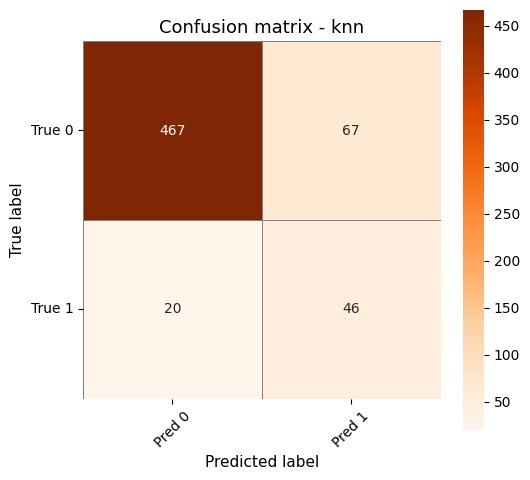

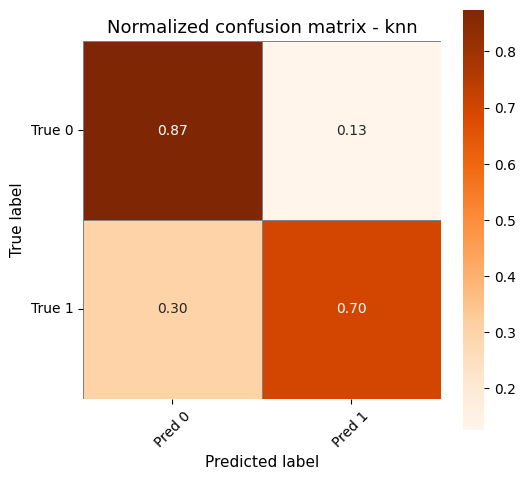

In [8]:
ml.evaluate_model(ml.knn, "knn")


MODEL: LOGREG
- Cấu hình: {'penalty': 'l2', 'dual': False, 'tol': 0.0001, 'C': 1.0, 'solver': 'lbfgs', 'max_iter': 100}

Kết quả trên tập test:
  • Accuracy : 0.8617
  • Precision: 0.9150
  • Recall   : 0.8617
  • F1-score : 0.8790

Chi tiết theo từng lớp:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       534
           1       0.43      0.82      0.57        66

    accuracy                           0.86       600
   macro avg       0.70      0.84      0.74       600
weighted avg       0.92      0.86      0.88       600



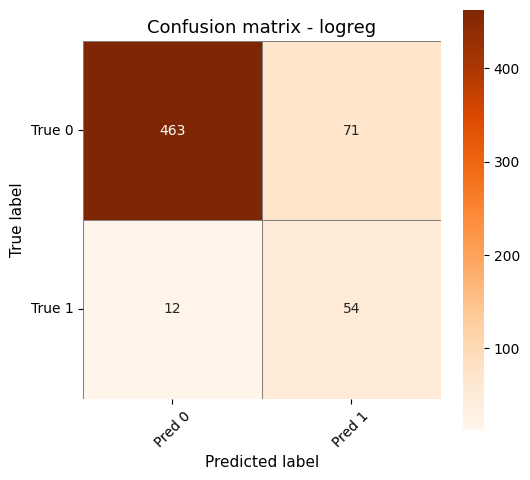

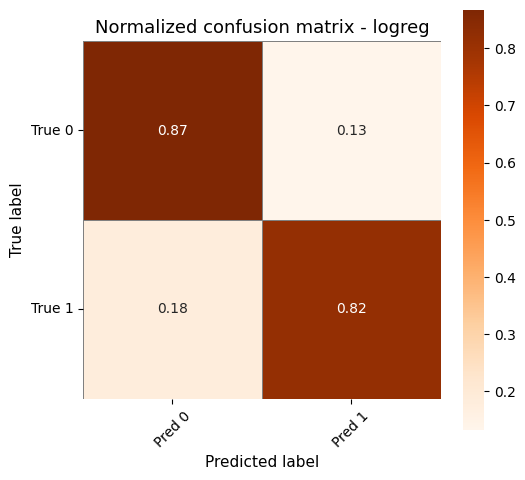

In [9]:
ml.evaluate_model(ml.logreg, "logreg")


MODEL: SVM
- Cấu hình: {'C': 1.0, 'kernel': 'rbf', 'degree': 3, 'gamma': 'scale', 'coef0': 0.0}

Kết quả trên tập test:
  • Accuracy : 0.8750
  • Precision: 0.9132
  • Recall   : 0.8750
  • F1-score : 0.8881

Chi tiết theo từng lớp:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       534
           1       0.46      0.77      0.58        66

    accuracy                           0.88       600
   macro avg       0.71      0.83      0.75       600
weighted avg       0.91      0.88      0.89       600



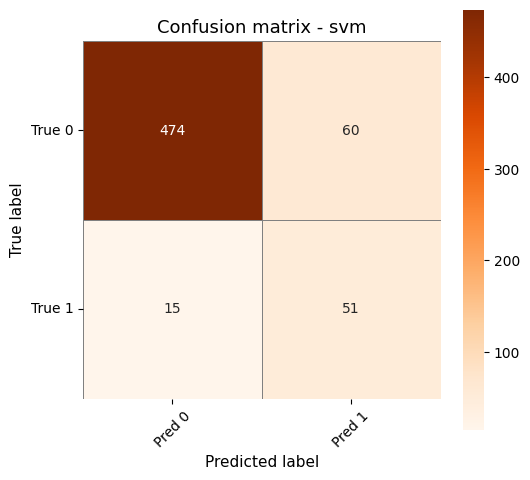

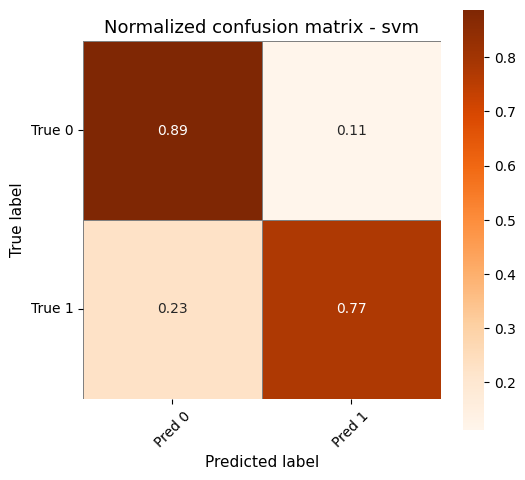

In [10]:
ml.evaluate_model(ml.svm, "svm")


MODEL: DECISIONTREE
- Cấu hình: {'criterion': 'gini', 'splitter': 'best', 'max_depth': None, 'min_samples_split': 2}

Kết quả trên tập test:
  • Accuracy : 0.8917
  • Precision: 0.8924
  • Recall   : 0.8917
  • F1-score : 0.8920

Chi tiết theo từng lớp:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       534
           1       0.51      0.52      0.51        66

    accuracy                           0.89       600
   macro avg       0.72      0.73      0.73       600
weighted avg       0.89      0.89      0.89       600



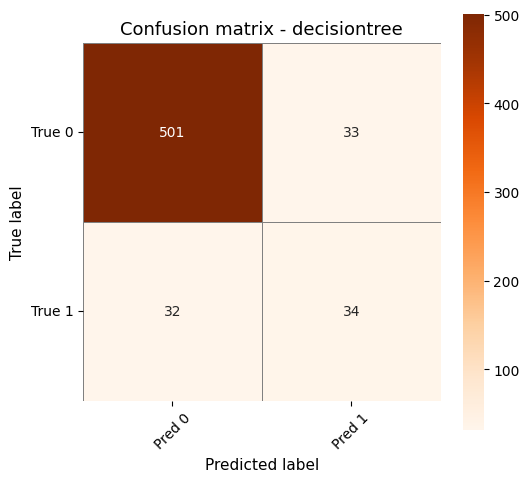

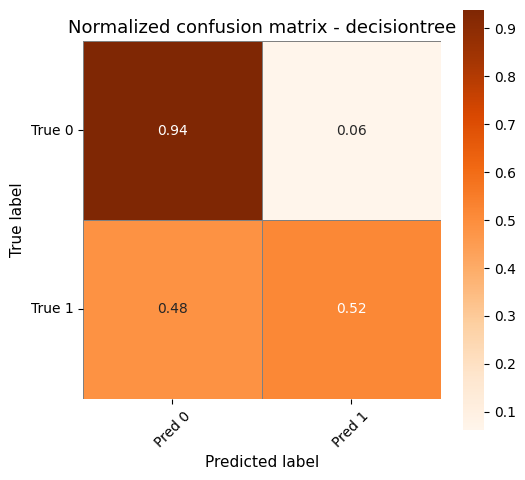

In [11]:
ml.evaluate_model(ml.decisiontree, "decisiontree")


MODEL: RANDOMFOREST
- Cấu hình: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}

Kết quả trên tập test:
  • Accuracy : 0.9017
  • Precision: 0.8972
  • Recall   : 0.9017
  • F1-score : 0.8992

Chi tiết theo từng lớp:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       534
           1       0.56      0.50      0.53        66

    accuracy                           0.90       600
   macro avg       0.75      0.73      0.74       600
weighted avg       0.90      0.90      0.90       600



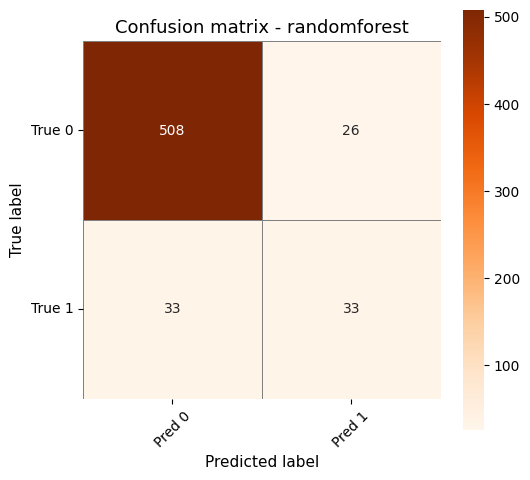

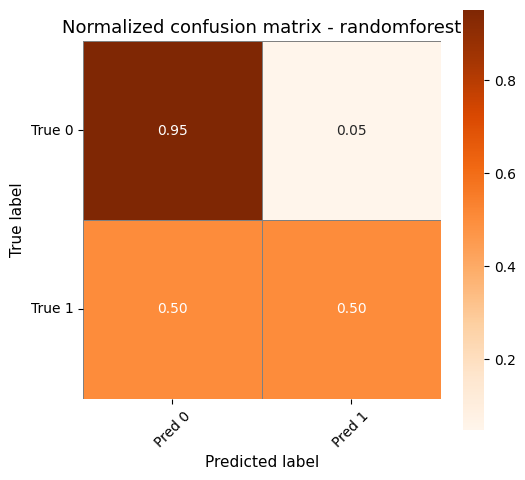

In [12]:
ml.evaluate_model(ml.randomforest, "randomforest")


MODEL: XGBOOST
- Cấu hình: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3, 'verbosity': 1}

Kết quả trên tập test:
  • Accuracy : 0.9117
  • Precision: 0.9226
  • Recall   : 0.9117
  • F1-score : 0.9160

Chi tiết theo từng lớp:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       534
           1       0.58      0.73      0.64        66

    accuracy                           0.91       600
   macro avg       0.77      0.83      0.80       600
weighted avg       0.92      0.91      0.92       600



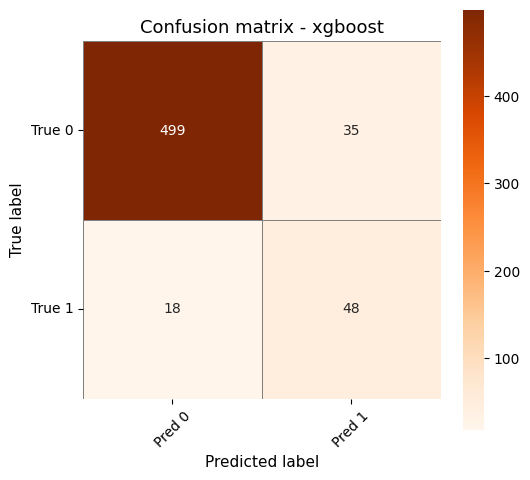

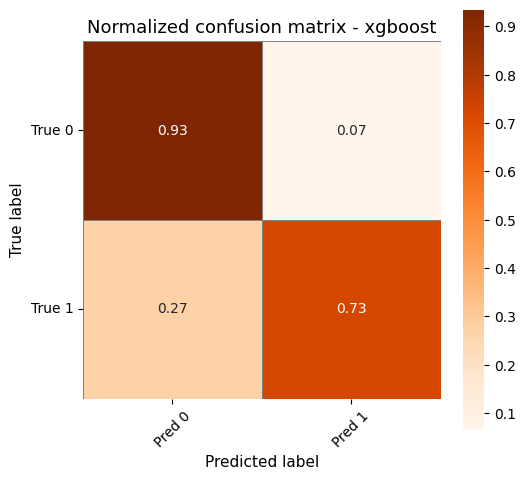

In [13]:
ml.evaluate_model(ml.xgboost, "xgboost")


MODEL: GRADIENTBOOSTING
- Cấu hình: {'loss': 'log_loss', 'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 1.0}

Kết quả trên tập test:
  • Accuracy : 0.9067
  • Precision: 0.9188
  • Recall   : 0.9067
  • F1-score : 0.9115

Chi tiết theo từng lớp:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       534
           1       0.56      0.71      0.63        66

    accuracy                           0.91       600
   macro avg       0.76      0.82      0.79       600
weighted avg       0.92      0.91      0.91       600



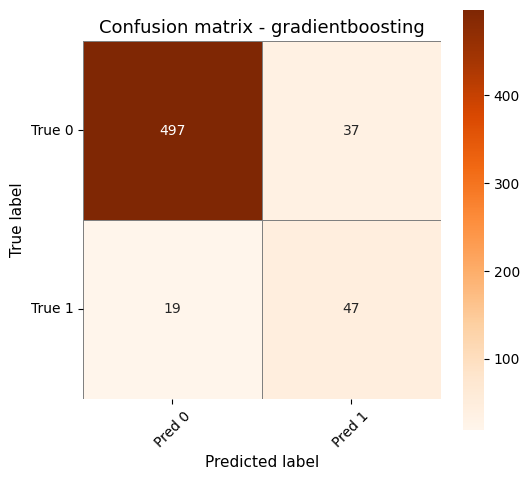

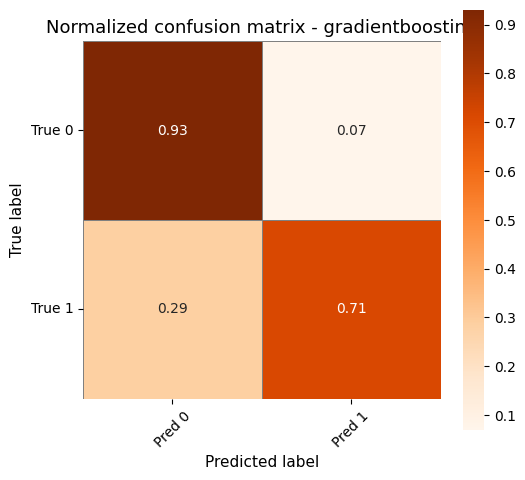

In [14]:
ml.evaluate_model(ml.gradientboosting, "gradientboosting")


MODEL: NAIVEBAYES
- Cấu hình: {}

Kết quả trên tập test:
  • Accuracy : 0.8117
  • Precision: 0.8878
  • Recall   : 0.8117
  • F1-score : 0.8383

Chi tiết theo từng lớp:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       534
           1       0.33      0.70      0.45        66

    accuracy                           0.81       600
   macro avg       0.64      0.76      0.67       600
weighted avg       0.89      0.81      0.84       600



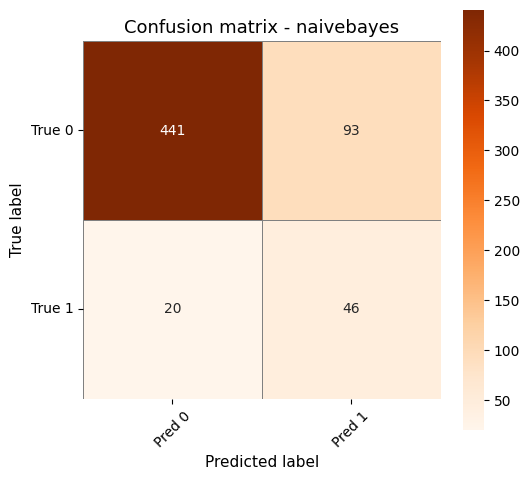

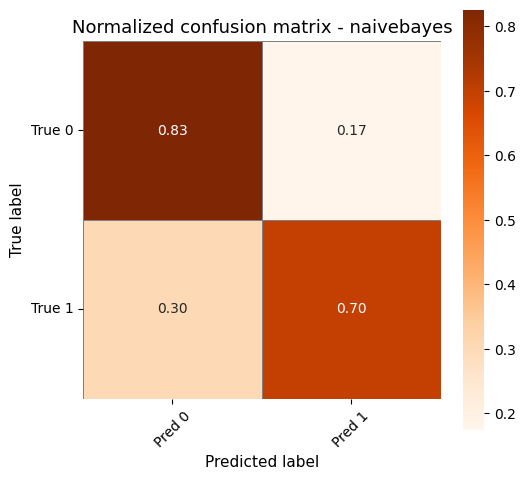

In [15]:
ml.evaluate_model(ml.naivebayes, "naivebayes")


MODEL: MLP
- Cấu hình: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}

Kết quả trên tập test:
  • Accuracy : 0.8917
  • Precision: 0.9013
  • Recall   : 0.8917
  • F1-score : 0.8959

Chi tiết theo từng lớp:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       534
           1       0.51      0.61      0.55        66

    accuracy                           0.89       600
   macro avg       0.73      0.77      0.75       600
weighted avg       0.90      0.89      0.90       600



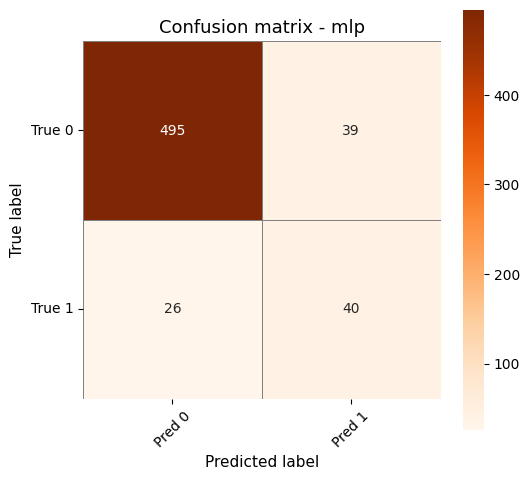

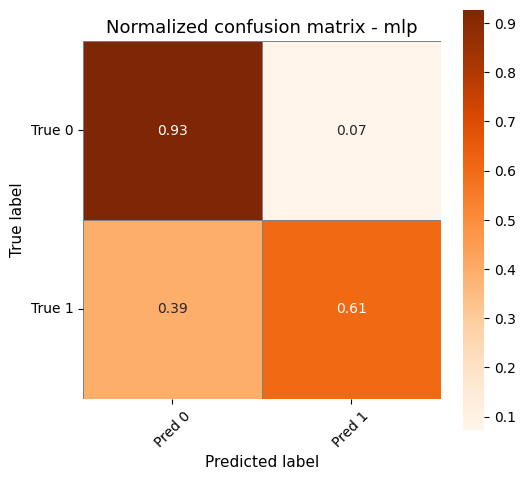

In [16]:
ml.evaluate_model(ml.mlp, "mlp")

In [17]:
ml.compare_performances(["knn", "logreg", "svm", "decisiontree", "randomforest", "xgboost", "gradientboosting", "naivebayes", "mlp"])

,Model,Accuracy,Precision,Recall,F1-Score
5,XGBOOST,0.911667,0.922628,0.911667,0.915991
6,GRADIENTBOOSTING,0.906667,0.918776,0.906667,0.911467
4,RANDOMFOREST,0.901667,0.897237,0.901667,0.899233
8,MLP,0.891667,0.901282,0.891667,0.895856
3,DECISIONTREE,0.891667,0.892387,0.891667,0.892023
2,SVM,0.875000,0.913240,0.875000,0.888141
1,LOGREG,0.861667,0.915036,0.861667,0.878988
0,KNN,0.855000,0.898228,0.855000,0.870699
7,NAIVEBAYES,0.811667,0.887791,0.811667,0.838290
